In [348]:
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.indicators.gd import GD
from pymoo.indicators.igd import IGD
import matplotlib.pyplot as plt
import numpy as np
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.termination import get_termination

In [349]:
class tester():
    total_time_comparison = 0
    total_convergence_comparison = 0
    algorithm1_win_execution_time = 0
    algorithm1_win_convergence = 0
    def __init__(self, algo1, algo2, problem):
        self.algo1 = algo1
        self.algo2 = algo2
        self.problem = problem
        self.res1 = None
        self.res2 = None
    
    def excute(self):
        res1 = minimize(self.problem,
               self.algo1,
               seed=1,
               termination = get_termination("n_gen", 400),
               save_history=True,
               verbose=False)
        
        res2 = minimize(self.problem,
               self.algo2,
               seed=1,
               termination = get_termination("n_gen", 400),
               save_history=True,
               verbose=False)
        
        self.res1 = res1
        self.res2 = res2
    
        #print("Best solution found by algorithm 1: \nX = %s\nOptimum found = %s\nCV = %s" % (res1.X, res1.F, res1.CV))
        #print("Best solution found by algorithm 2: \nX = %s\nOptimum found = %s\nCV = %s \n" % (res2.X, res2.F, res2.CV))
        print('Execution time of algorithm 1:', res1.exec_time)
        print('Execution time of algorithm 2:', res2.exec_time,'\n')
        
        if res1.exec_time < res2.exec_time:
            print("Algorithm 1 has shorter execution time\n")
            tester.algorithm1_win_execution_time +=1
        else:
            print("Algorithm 2 has shorter execution time\n")
        tester.total_time_comparison += 1
        pf = self.problem.pareto_front()
        ind = GD(pf)

        if res1.F is None:
            print("No feasible solution found by algorithm 1")
        else:
            print("Generational Distance of algorithm 1:", ind(res1.F))
            if res2.F is None:
                tester.algorithm1_win_convergence += 1
                tester.total_convergence_comparison += 1
        
        if res2.F is None:
            print("No feasible solution found by algorithm 2")
        else:
            print("Generational Distance of algorithm 2:", ind(res2.F),'\n')
            if res1.F is None:
                tester.total_convergence_comparison += 1

        if not (res1.F is None or res2.F is None):
            if ind(res1.F) < ind(res2.F):
                print("Algorithm 1 has a better approximation to the global optimum\n")
                tester.algorithm1_win_convergence += 1
            else:
                print("Algorithm 2 has a better approximation to the global optimum\n")
            tester.total_convergence_comparison += 1

    def visualize(self):
        res1 = self.res1
        res2 = self.res2
        opt1 = np.array([e.opt[0].F for e in res1.history])
        opt2 = np.array([e.opt[0].F for e in res2.history])
        pf = self.problem.pareto_front()
        n_eval1 = np.arange(len(res1.history))
        n_eval2 = np.arange(len(res2.history))
        plt.plot(n_eval1, opt1, label="Algorithm 1")
        plt.plot(n_eval2, opt2, label="Algorithm 2")
        plt.hlines(y=pf[0], xmin=0, xmax=max(n_eval1[-1],n_eval2[-1]), colors='purple', linestyles='--', lw=2)
        plt.title("Convergence Comparision")
        plt.xlabel("Genernation")
        plt.ylabel("Optimum in each generation")
        if pf[0] >= 0:
            plt.yscale("log")
        plt.legend()
        plt.show()
    
    def reset_count():
        tester.total_time_comparison = 0
        tester.total_convergence_comparison = 0
        tester.algorithm1_win_execution_time = 0
        tester.algorithm1_win_convergence = 0

In [350]:
algorithm1 = PSO()
algorithm2 = GA()
n_var = 20

Execution time of algorithm 1: 2.0353446006774902
Execution time of algorithm 2: 4.846673011779785 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 0.0059036890246422224
Generational Distance of algorithm 2: 0.04751631058219674 

Algorithm 1 has a better approximation to the global optimum



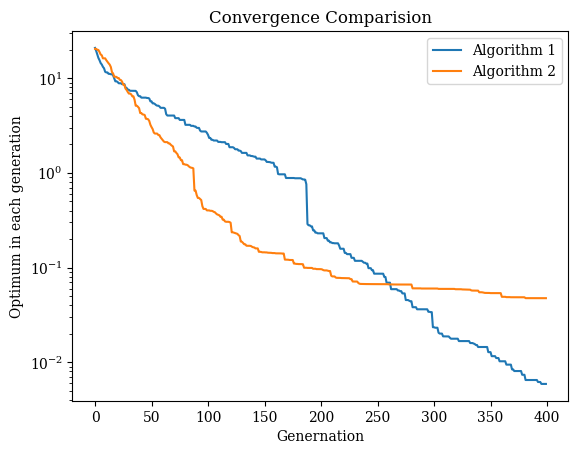

In [369]:
ackley_tester = tester(algorithm1,algorithm2,get_problem("ackley", n_var=n_var, a=20, b=1/5, c=2 * np.pi))
ackley_tester.excute()
ackley_tester.visualize()

Execution time of algorithm 1: 1.4695405960083008
Execution time of algorithm 2: 4.6727142333984375 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 0.0018395338062069388
Generational Distance of algorithm 2: 0.02171355200107128 

Algorithm 1 has a better approximation to the global optimum



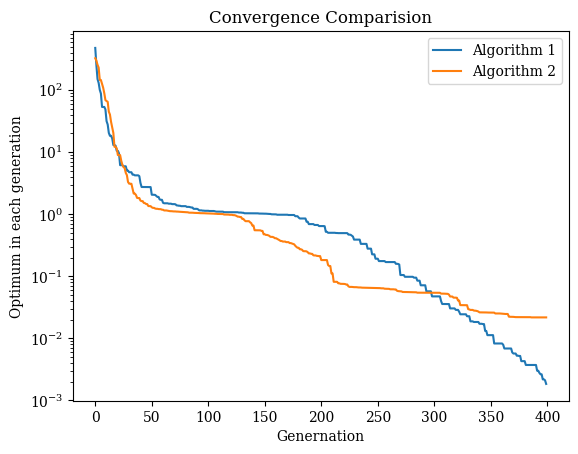

In [352]:
griewank_tester = tester(algorithm1,algorithm2,get_problem("griewank", n_var=n_var))
griewank_tester.excute()
griewank_tester.visualize()

Execution time of algorithm 1: 5.795858383178711
Execution time of algorithm 2: 5.068826913833618 

Algorithm 2 has shorter execution time

Generational Distance of algorithm 1: 26.59664765491135
Generational Distance of algorithm 2: 0.0056150984157739 

Algorithm 2 has a better approximation to the global optimum



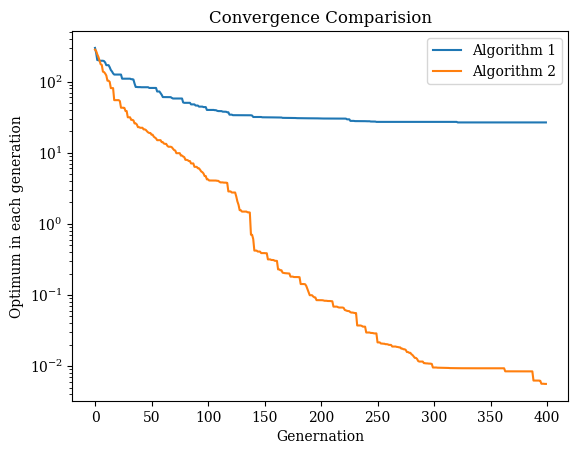

In [353]:
rastrigin_tester = tester(algorithm1,algorithm2,get_problem("rastrigin", n_var=n_var))
rastrigin_tester.excute()
rastrigin_tester.visualize()

Execution time of algorithm 1: 1.7214136123657227
Execution time of algorithm 2: 4.657979249954224 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 14.335133452292288
Generational Distance of algorithm 2: 16.294495399816945 

Algorithm 1 has a better approximation to the global optimum



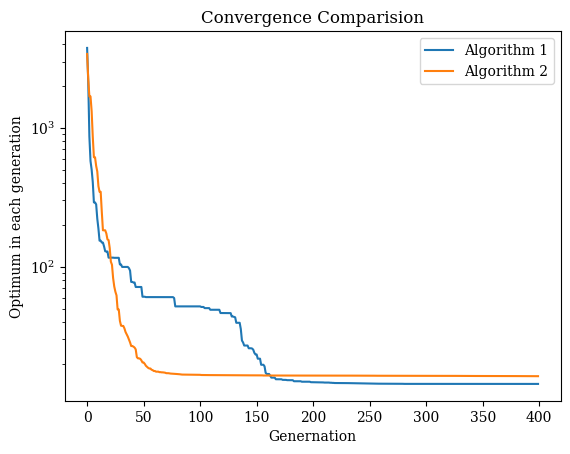

In [354]:
rosenbrock_tester = tester(algorithm1,algorithm2,get_problem("rosenbrock", n_var=n_var))
rosenbrock_tester.excute()
rosenbrock_tester.visualize()

Execution time of algorithm 1: 1.5393197536468506
Execution time of algorithm 2: 5.033184051513672 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 5.218341167887057
Generational Distance of algorithm 2: 2.7908169166818295 

Algorithm 2 has a better approximation to the global optimum



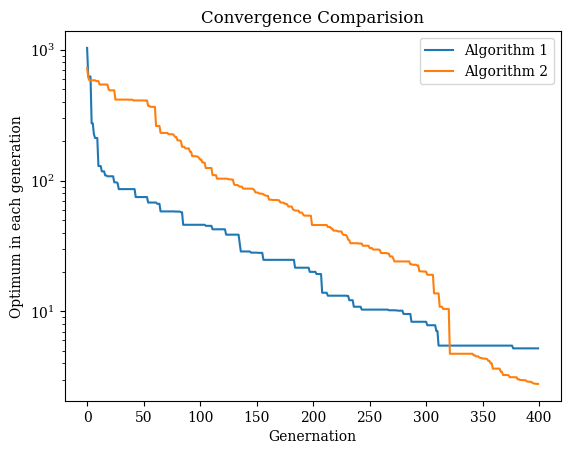

In [355]:
zakharov_tester = tester(algorithm1,algorithm2,get_problem("zakharov", n_var=n_var))
zakharov_tester.excute()
zakharov_tester.visualize()

Execution time of algorithm 1: 1.9105923175811768
Execution time of algorithm 2: 5.678933620452881 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 1.1718856616551
Generational Distance of algorithm 2: 0.007088575321013479 

Algorithm 2 has a better approximation to the global optimum



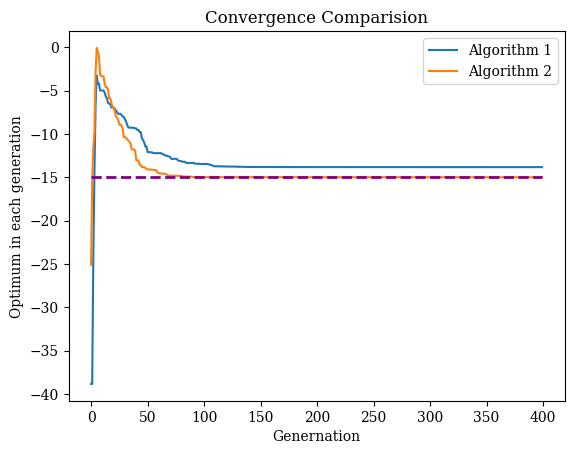

In [356]:
g01_tester = tester(algorithm1,algorithm2,get_problem("g1"))
g01_tester.excute()
g01_tester.visualize()

Execution time of algorithm 1: 1.638051986694336
Execution time of algorithm 2: 4.932394027709961 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 0.4086033726525027
Generational Distance of algorithm 2: 0.0629851118492607 

Algorithm 2 has a better approximation to the global optimum



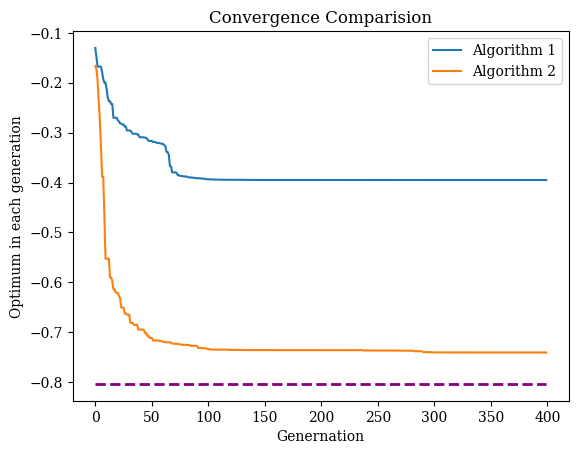

In [357]:
g02_tester = tester(algorithm1,algorithm2,get_problem("g2"))
g02_tester.excute()
g02_tester.visualize()

Execution time of algorithm 1: 1.5650405883789062
Execution time of algorithm 2: 8.731147527694702 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 0.9797654859321908
Generational Distance of algorithm 2: 0.9982230413180206 

Algorithm 1 has a better approximation to the global optimum



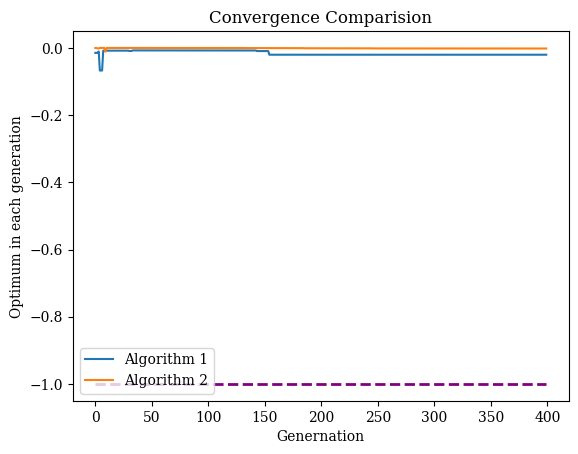

In [358]:
g03_tester = tester(algorithm1,algorithm2,get_problem("g3"))
g03_tester.excute()
g03_tester.visualize()

Execution time of algorithm 1: 1.7709619998931885
Execution time of algorithm 2: 5.189202070236206 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 0.0002904894427047111
Generational Distance of algorithm 2: 6.4600026616608375 

Algorithm 1 has a better approximation to the global optimum



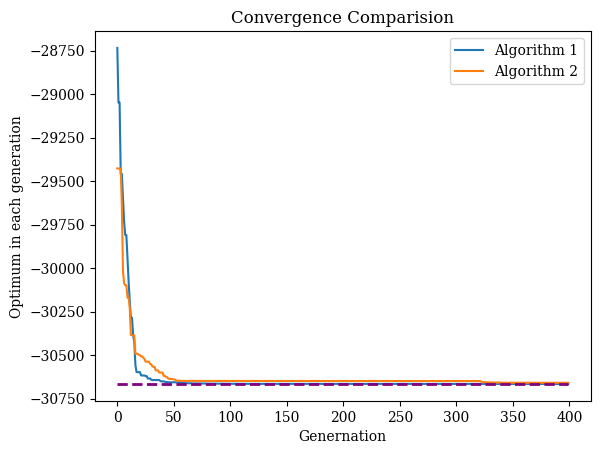

In [359]:
g04_tester = tester(algorithm1,algorithm2,get_problem("g4"))
g04_tester.excute()
g04_tester.visualize()

Execution time of algorithm 1: 1.5836331844329834
Execution time of algorithm 2: 5.36660361289978 

Algorithm 1 has shorter execution time

No feasible solution found by algorithm 1
No feasible solution found by algorithm 2


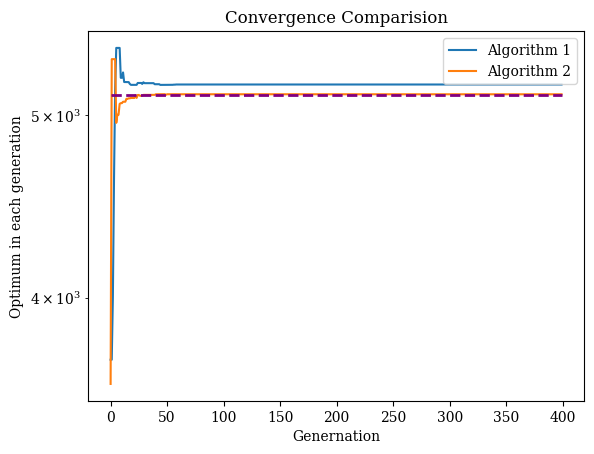

In [360]:
g05_tester = tester(algorithm1,algorithm2,get_problem("g5"))
g05_tester.excute()
g05_tester.visualize()

Execution time of algorithm 1: 1.6123497486114502
Execution time of algorithm 2: 4.906246900558472 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 3.171764700455242
Generational Distance of algorithm 2: 14.877526714916712 

Algorithm 1 has a better approximation to the global optimum



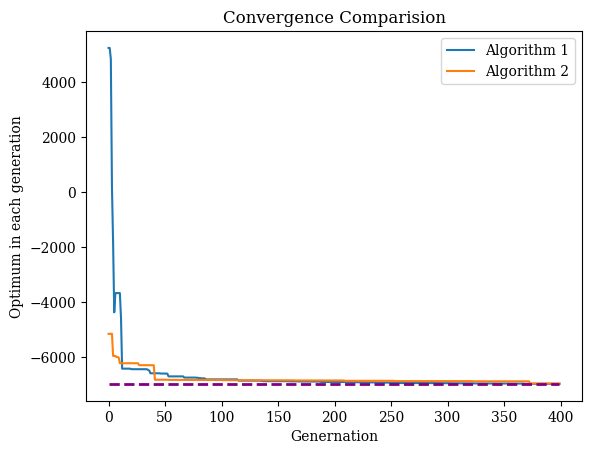

In [361]:
g06_tester = tester(algorithm1,algorithm2,get_problem("g6"))
g06_tester.excute()
g06_tester.visualize()

Execution time of algorithm 1: 1.6509368419647217
Execution time of algorithm 2: 4.822694301605225 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 3.8206550632340175
Generational Distance of algorithm 2: 0.9954793223823302 

Algorithm 2 has a better approximation to the global optimum



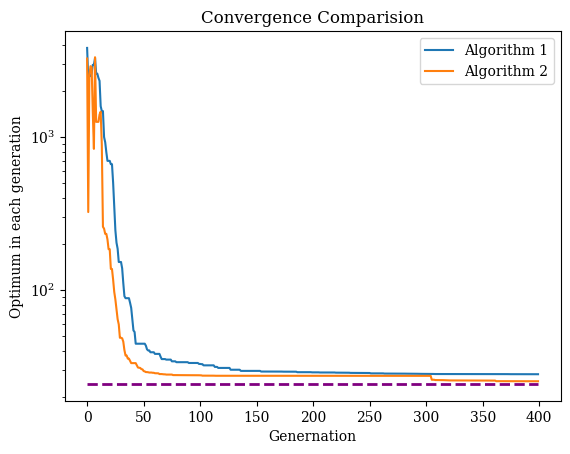

In [362]:
g07_tester = tester(algorithm1,algorithm2,get_problem("g7"))
g07_tester.excute()
g07_tester.visualize()

Execution time of algorithm 1: 2.185561418533325
Execution time of algorithm 2: 5.290703773498535 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 0.0
Generational Distance of algorithm 2: 1.0466210204063131e-08 

Algorithm 1 has a better approximation to the global optimum



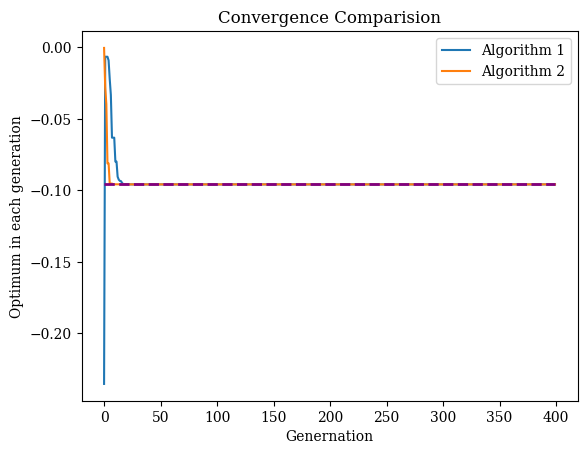

In [366]:
g08_tester = tester(algorithm1,algorithm2,get_problem("g8"))
g08_tester.excute()
g08_tester.visualize()

Execution time of algorithm 1: 1.5375194549560547
Execution time of algorithm 2: 8.824501037597656 

Algorithm 1 has shorter execution time

Generational Distance of algorithm 1: 0.28637529218133295
Generational Distance of algorithm 2: 0.6566833520857926 

Algorithm 1 has a better approximation to the global optimum



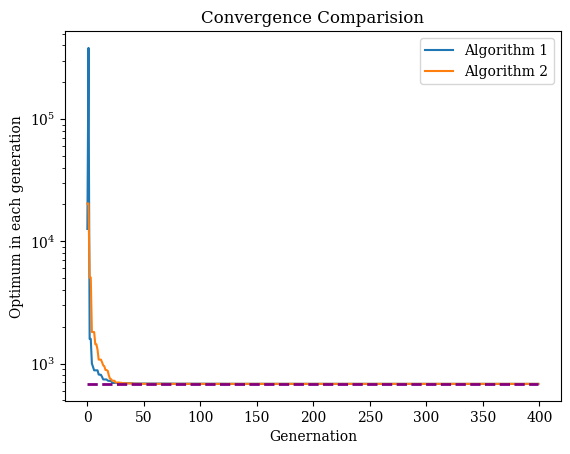

In [364]:
g09_tester = tester(algorithm1,algorithm2,get_problem("g9"))
g09_tester.excute()
g09_tester.visualize()

In [371]:
print(tester.total_time_comparison)
print(tester.algorithm1_win_execution_time)
print(tester.total_time_comparison-tester.algorithm1_win_execution_time)
print(tester.total_convergence_comparison)
print(tester.algorithm1_win_convergence)
print(tester.total_convergence_comparison-tester.algorithm1_win_convergence)
tester.reset_count()

0
0
0
0
0
0
